## 1. Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing datasets

In [3]:
# Importing Dataset
df = pd.read_csv(r'D:\ML\Kaggle\Binary_Classification_of_Insurance_Cross_Selling\train.csv')

# Verify
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


## 3. Data Understanding

####  About the Dataset:   
The dataset (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. 

#### Objective:  
The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

#### Column Definitions
1. **id:** Unique identifier for each record .
2. **Gender:** The gender of the individual (e.g., Male, Female).
3. **Age:** The age of the individual.
4. **Driving_License:** Indicates whether the individual has a driving license (e.g., 1 for yes, 0 for no).
5. **Region_Code:** Code representing the region where the individual is located.
6. **Previously_Insured:** Indicates whether the individual was previously insured (e.g., 1 for yes, 0 for no).
7. **Vehicle_Age:** The age of the vehicle (e.g., 1-2 years, 2-3 years, 3+ years).
8. **Vehicle_Damage:** Indicates if the vehicle has previously been damaged (e.g., 1 for yes, 0 for no).
9. **Annual_Premium:** The annual premium amount paid for the insurance policy.
10. **Policy_Sales_Channel:** The sales channel through which the policy was sold.
11. **Vintage:** The number of days since the customer first contacted the company.
12. **Response:** Target variable indicating whether the customer responded to the insurance offer (e.g., 1 for yes, 0 for no).

In [4]:
# Viewing data size
df.shape

(11504798, 12)

In [5]:
# since the data is huge, let us set the simple format
pd.set_option('display.float_format', '{:.2f}'.format)

# Viewing data description
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00
mean,5752398.50,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321149.26,14.99,0.04,12.99,0.50,16454.75,54.04,79.98,0.33
min,0.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876199.25,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752398.50,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628597.75,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


## 4. Data Cleaning

In [6]:
# Viewing null values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

From the above we can understand, that the dataset does not have any missing values. Let's proceed with Exploratory Data Analysis (EDA).

## 5. Exploratory Data Analysis

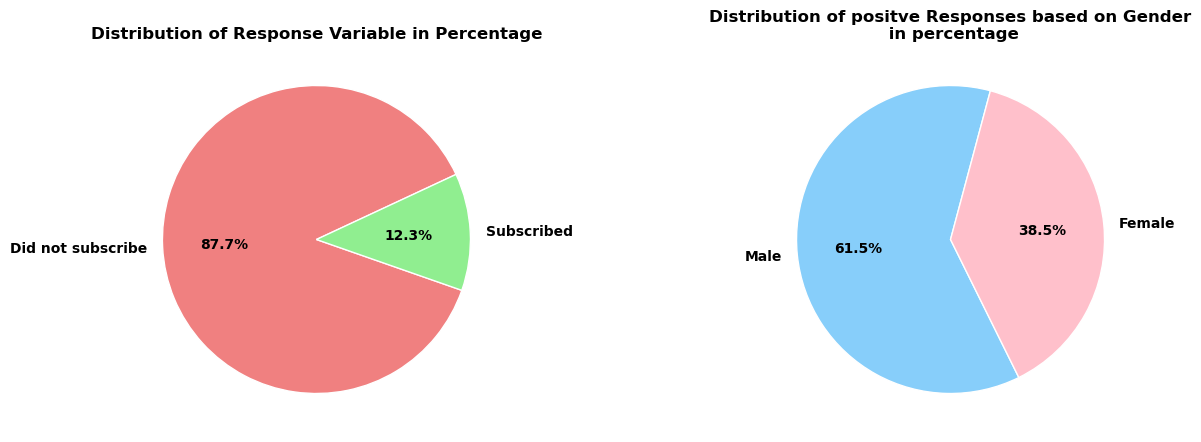

In [7]:
# Creating Subplots
figure, axes = plt.subplots(1, 2, figsize = (15,5))
plt.subplots_adjust(wspace=0.2)

# 1. Distribution of Response variable 
chart_data = (df.Response.value_counts()/df.shape[0]*100)
axes[0].pie(chart_data,labels = ['Did not subscribe', 'Subscribed'],  colors = ['lightcoral' , 'lightgreen'] , wedgeprops = dict(edgecolor ='white'),\
            startangle = 25,autopct='%1.1f%%')
axes[0].set_title('Distribution of Response Variable in Percentage')

# 2. Distribution of positve Responses based on Gender
gender_data = (df.Gender[df.Response == 1].value_counts()/df.shape[0])*100
axes[1].pie(gender_data,labels = ['Male', 'Female'],  colors = ['lightskyblue' , 'pink'] , wedgeprops = dict(edgecolor ='white'), autopct='%1.1f%%',\
           startangle = 75)
axes[1].set_title('Distribution of positve Responses based on Gender\n in percentage')

plt.show()

- From the `Distribution of the Response chart`, we can see that approximately 88% of the people did not opt for insurance, while only 12% opted for insurance. This indicates a significant class imbalance that should be addressed.

- Among the 12% of total insurance subscribers, males have a higher subscription rate with 61%, compared to females, who have around 38%.

In [8]:
# Let us create a smaller dataset with only the insured people for analysis
insured_df = df[df['Response'] == 1]

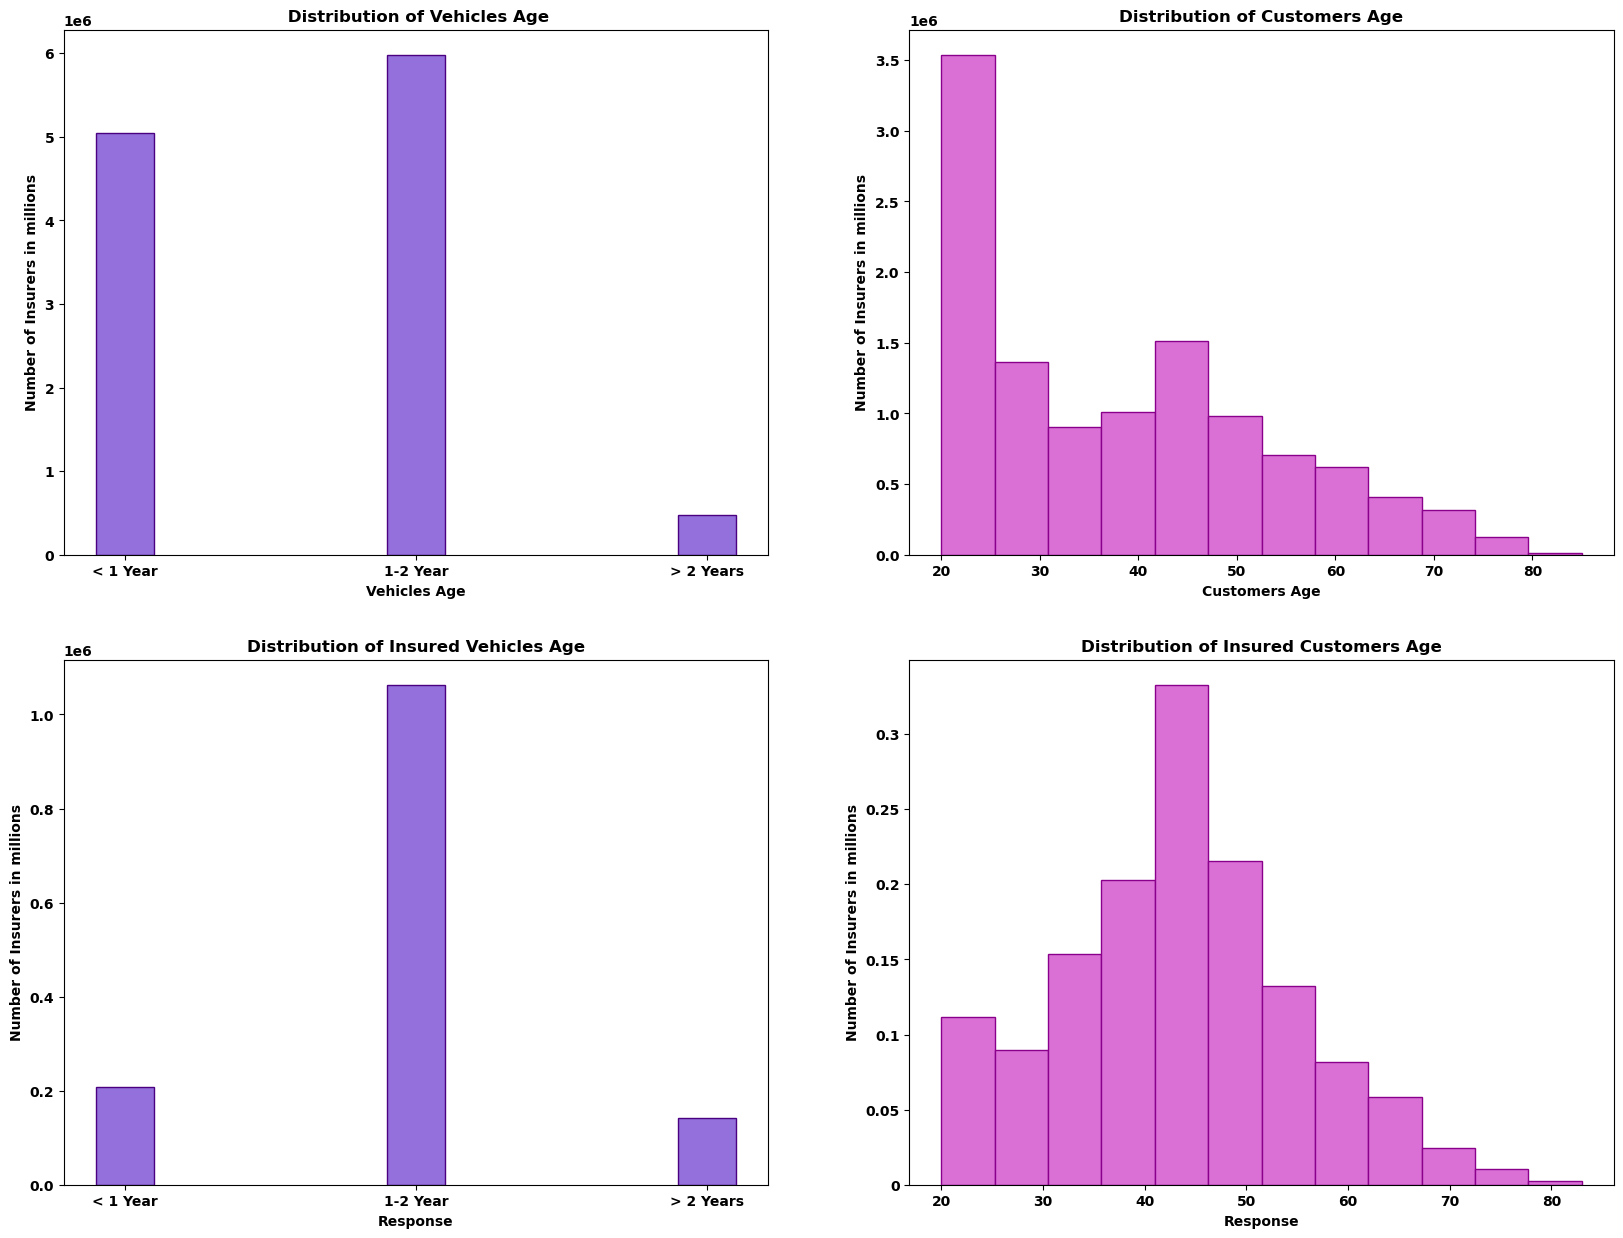

In [9]:
# Creating Subplots
figure, axes = plt.subplots(2, 2, figsize = (20,15))
plt.subplots_adjust(wspace=0.2)

# 1. Plotting Distribution of Vehicles Age
va_data = pd.DataFrame(df.Vehicle_Age.value_counts()).loc[['< 1 Year', '1-2 Year', '> 2 Years']]
axes[0,0].bar( x = va_data.index ,height = va_data['count'] ,color  = 'mediumpurple', edgecolor = 'indigo', width = 0.2)
axes[0,0].set_title(' Distribution of Vehicles Age')
axes[0,0].set_xlabel('Vehicles Age')
axes[0,0].set_ylabel('Number of Insurers in millions')

# 2. Plotting Distribution of Customers Age
axes[0,1].hist(data = df, x = 'Age' ,color  = 'orchid' , edgecolor = 'darkmagenta', bins = 12)
axes[0,1].set_title('Distribution of Customers Age')
axes[0,1].set_xlabel('Customers Age')
axes[0,1].set_ylabel('Number of Insurers in millions')

# 3. Plotting Distribution of Insured Vehicles Age
iva_data = pd.DataFrame(insured_df.Vehicle_Age.value_counts()).loc[['< 1 Year', '1-2 Year', '> 2 Years']]
axes[1,0].bar( x = iva_data.index ,height = iva_data['count'] ,color  = 'mediumpurple', edgecolor = 'indigo', width = 0.2)
axes[1,0].set_title('Distribution of Insured Vehicles Age')
axes[1,0].set_xlabel('Response')
axes[1,0].set_ylabel('Number of Insurers in millions')


# 4. Plotting Distribution of Insured Customers Age
axes[1,1].hist( data = insured_df, x = 'Age' ,color  = 'orchid' , edgecolor = 'darkmagenta' , bins = 12)
axes[1,1].set_title('Distribution of Insured Customers Age')
axes[1,1].set_xlabel('Response')
axes[1,1].set_ylabel('Number of Insurers in millions')
axes[1,1].set_yticklabels([0, 0.05 , 0.1, 0.15, 0.2, 0.25,0.3, 0.35])

plt.show()

From the charts we can infer,
- **Vechichles age**
    - Brand new vehicles (less than a year old) are surprisingly common, yet only a small fraction appear to be insured. This suggests a potential gap in awareness or a need for streamlined insurance options for new car owners.
    - Vehicles between 1 and 2 years old see a significant jump in insurance rates compared to brand new ones. This could indicate an inflection point where drivers become more aware of the need for insurance or their insurance requirements change.
- **Customers Age**
    - There is a discrepancy between the age demographics of vehicle owners and insured customers. While most vehicle owners are aged between 20 and 30 years, the majority of insured customers fall within the 34-50 age range.
    - This divergence may be due to younger drivers being less likely to fully own their vehicles or showing less concern for insurance coverage.

We will not delve further into Exploratory Data Analysis (EDA), as our primary objective is to develop a model for predicting the binary classification of insurance cross-selling. Let us now proceed with the data preparation for modeling.

## 6. Data Preparation

In [10]:
# Viewing the datatypes
df.dtypes[df.dtypes == 'object']

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

### 6.1 Binary Encoding

Let's convert all the categorical variables into numeric format using encoding methods.

#### 6.1.1. One-Hot Encoding

In [11]:
# Encoding the variables
# 1. Vehicle Damage
df.Vehicle_Damage = df.Vehicle_Damage.map({'Yes' : 1 , 'No' : 0})

# 2. Gender
df.Gender = df.Gender.map({'Male' : 1 , 'Female' : 0})

# Verify
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.00,0,1-2 Year,1,65101.00,124.00,187,0
1,1,1,43,1,28.00,0,> 2 Years,1,58911.00,26.00,288,1
2,2,0,25,1,14.00,1,< 1 Year,0,38043.00,152.00,254,0
3,3,0,35,1,1.00,0,1-2 Year,1,2630.00,156.00,76,0
4,4,0,36,1,15.00,1,1-2 Year,0,31951.00,152.00,294,0


#### 6.1.2. Ordinal Encoding

In [12]:
# 3. Vehicle Age

# Importing Libraries
from sklearn.preprocessing import OrdinalEncoder

# Creating instance for Ordinal Encoder
enc = OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

# Fitting and Transforming the column
df.Vehicle_Age = enc.fit_transform(df[['Vehicle_Age']])

# Verify
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.00,0,1.00,1,65101.00,124.00,187,0
1,1,1,43,1,28.00,0,2.00,1,58911.00,26.00,288,1
2,2,0,25,1,14.00,1,0.00,0,38043.00,152.00,254,0
3,3,0,35,1,1.00,0,1.00,1,2630.00,156.00,76,0
4,4,0,36,1,15.00,1,1.00,0,31951.00,152.00,294,0


In [13]:
# Verifying the encoding
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

From the above, we can observe that all the data is now in a numeric format.

### 6.2. Splitting the Train and Test data

In [14]:
# Importing libraries
from sklearn.model_selection import train_test_split

# Splitting the data
X = df.drop(['Response', 'id'], axis=1)
y = df['Response']
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 7)

# Verify
print('Train Size : ')
print('X :', X_train.shape , '\ny :' , y_train.shape, '\n\n')
print('Test Size : ')
print('X :', X_test.shape , '\ny :' , y_test.shape)

Train Size : 
X : (8628598, 10) 
y : (8628598,) 


Test Size : 
X : (2876200, 10) 
y : (2876200,)


### 6.3. Addressing Class Imbalance

In [15]:
# Viewing the Class Imbalance
round(y_train.value_counts()/y_train.shape[0]*100 , 2)

Response
0   87.70
1   12.30
Name: count, dtype: float64

We observed a significant class imbalance, with `Class 0 comprising over 88%` of the data and `Class 1 making up only 12%`. 


I explored several methods to address class imbalance in my dataset:

- `SMOTE and ADASYN:` Unfortunately, both techniques resulted in memory errors due to the large dataset size when run on both my local machine and cloud environments like Google Colab.
- `Undersampling:` While this approach was implemented, it yielded lower accuracy than desired.
- `Weighted Logistic Regression:` This method also underperformed, achieving only 64% accuracy on the training set.

Based on these findings, let us first reduce the training data for class 0 by half. Following this, we will apply SMOTE oversampling to effectively tackle the class imbalance. Finally, we will build the predictive model using a decision tree algorithm.

#### 6.3.1. Undersampling

In [16]:

# Combine X_train and y_train for easy manipulation
train_data = pd.concat([X_train, y_train], axis=1)


# Separate the majority and minority classes
minority_class = train_data[train_data['Response'] == 1]
majority_class = train_data[train_data['Response'] == 0]

# Choosing the number of samples to keep
n_sam = len(majority_class) // 2

# Undersample the majority class
majority_class_undersampled = majority_class.sample(n_sam, random_state=42)


# Combine minority class with undersampled majority class
undersampled_df = pd.concat([minority_class, majority_class_undersampled])

# Defining X and Y variables
X = undersampled_df.drop(['Response'] , axis = 1)
y = undersampled_df['Response']

# Splitting the dataset
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 7)


# Verify
print('Train Size : ')
print('X :', X_train.shape , '\ny :' , y_train.shape, '\n\n')
print('Test Size : ')
print('X :', X_test.shape , '\ny :' , y_test.shape)

Train Size : 
X : (3633725, 10) 
y : (3633725,) 


Test Size : 
X : (1211242, 10) 
y : (1211242,)


#### 6.3.2. SMOTE

In [17]:
# Imporitng necessary libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Counting the Class values before sampling
counter = Counter(y_train)
print('Before Sampling' , counter)

# Initializing Random Under sampler
sm = SMOTE(random_state = 31)

# Fitting the sampler
X_train_sm, y_train_sm = sm.fit_resample(X_train , y_train)

# Counting the Class values after sampling
counter = Counter(y_train_sm)
print('After Sampling' , counter)

Before Sampling Counter({0: 2837853, 1: 795872})
After Sampling Counter({0: 2837853, 1: 2837853})


## 7. Building the Model

In [18]:
# Importing necessary Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , roc_auc_score, roc_curve

# For decision tree visualization
#pip install pydotplus
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

# Instantiating the algorithm
dt = DecisionTreeClassifier(max_depth = 5)

# Fitting the model
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=5)

#### 7.1. Decision Tree Visualization

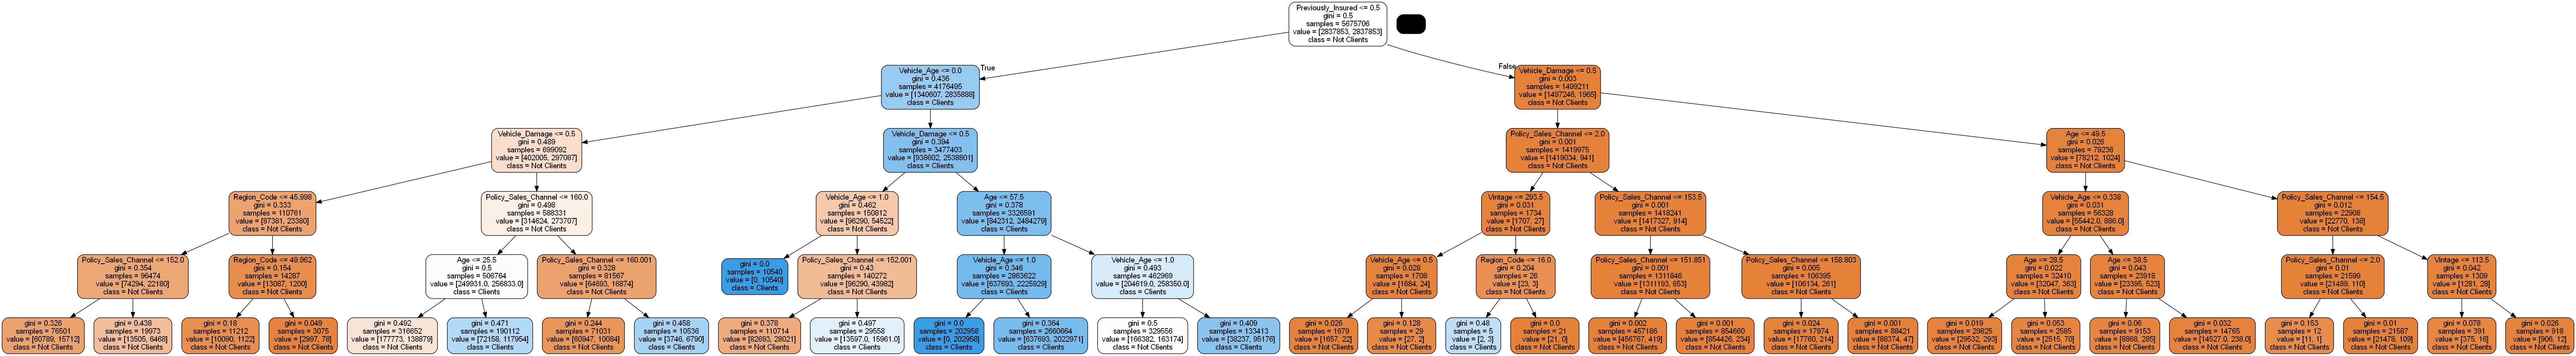

In [19]:
# Standard code for decision tree visualization
dot_data = StringIO()

export_graphviz(dt ,out_file = dot_data , filled = True ,  rounded = True , feature_names = X_train.columns, class_names = ['Not Clients' , 'Clients'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [20]:
# Predicting the subscribers for the different datasets
y_train_sm_pred = dt.predict(X_train_sm)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Printing the classification report for each data sets
print('Ransam: \n' , classification_report(y_train_sm, y_train_sm_pred))
print('\nTrain: \n' , classification_report(y_train, y_train_pred))
print('\nTest: \n' , classification_report(y_test, y_test_pred))

Ransam: 
               precision    recall  f1-score   support

           0       0.85      0.73      0.79   2837853
           1       0.76      0.87      0.81   2837853

    accuracy                           0.80   5675706
   macro avg       0.81      0.80      0.80   5675706
weighted avg       0.81      0.80      0.80   5675706


Train: 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82   2837853
           1       0.47      0.84      0.60    795872

    accuracy                           0.75   3633725
   macro avg       0.70      0.78      0.71   3633725
weighted avg       0.84      0.75      0.77   3633725


Test: 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82    945778
           1       0.47      0.84      0.60    265464

    accuracy                           0.75   1211242
   macro avg       0.70      0.78      0.71   1211242
weighted avg       0.84      0.75      0.77  

#### 7.2. ROC Curve

In [21]:
# Creating a function to plot ROC curve
def draw_roc(actual,probs):
    FPR, TPR, thresholds = roc_curve(actual, probs, drop_intermediate = False)
    auc_score = roc_auc_score(actual,probs)
    plt.figure(figsize = [5,5])
    plt.plot(FPR, TPR, label = 'ROC curve(area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

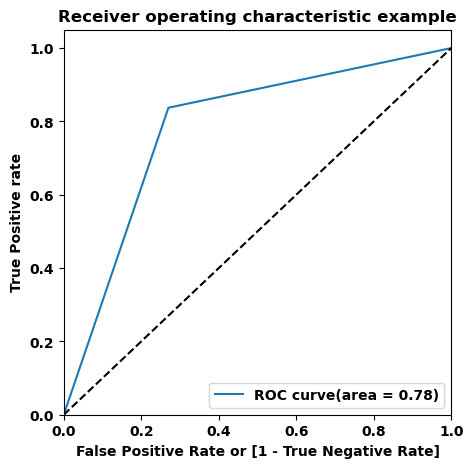

In [22]:
# Calling the function to plot ROC curve for the test set
draw_roc(y_test , y_test_pred)

The AUC score of 0.7836 demonstrates that the model has a robust ability to differentiate between the two classes in the binary classification task. This score indicates a good balance between sensitivity and specificity, suggesting the model is effective in predicting outcomes for insurance cross-selling.



## 8. Predicting on the actual Test set

In [23]:
# Importing Dataset
test = pd.read_csv(r'D:\ML\Kaggle\Binary_Classification_of_Insurance_Cross_Selling\test.csv')

# Verify
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.00,0,< 1 Year,No,2630.00,160.00,228
1,11504799,Male,47,1,28.00,0,1-2 Year,Yes,37483.00,124.00,123
2,11504800,Male,47,1,43.00,0,1-2 Year,Yes,2630.00,26.00,271
3,11504801,Female,22,1,47.00,1,< 1 Year,No,24502.00,152.00,115
4,11504802,Male,51,1,19.00,0,1-2 Year,No,34115.00,124.00,148


In [24]:
# Encoding the variables
# 1. Vehicle Damage
test.Vehicle_Damage = test.Vehicle_Damage.map({'Yes' : 1 , 'No' : 0})

# 2. Gender
test.Gender = test.Gender.map({'Male' : 1 , 'Female' : 0})

# 3. Vehicle Age
# Creating instance for Ordinal Encoder
enc = OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

# Fitting and Transforming the column
test.Vehicle_Age = enc.fit_transform(test[['Vehicle_Age']])

# Verify
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.00,0,0.00,0,2630.00,160.00,228
1,11504799,1,47,1,28.00,0,1.00,1,37483.00,124.00,123
2,11504800,1,47,1,43.00,0,1.00,1,2630.00,26.00,271
3,11504801,0,22,1,47.00,1,0.00,0,24502.00,152.00,115
4,11504802,1,51,1,19.00,0,1.00,0,34115.00,124.00,148


In [25]:
# Preparing the test set
test_X = test.drop('id' , axis = 1)

# Predicting on the test set
test_pred = dt.predict_proba(test_X)

In [26]:
# Creating Data frame for submission
test['Response'] = test_pred[:, 1:]
sub = test[['id' , 'Response']]

In [28]:
# Exporting the Data frame to CSV file for submission
sub.to_csv(r'D:\ML\Kaggle\Binary_Classification_of_Insurance_Cross_Selling\submission.csv' , index = False)